## FIFA 23 Players Project



## Introduction : 
This project analyzes the FIFA 23 players' data using various data science techniques. The goal is to explore the dataset, perform data cleaning, and apply machine learning algorithms to predict player values. The project involves importing necessary libraries, reading and merging datasets, conducting exploratory data analysis (EDA), and visualizing the data.
# Description : 
- The First Data (FIFA 23 Player's Names) Has 4000 Rows and 5 Columns That Contain :
1. Full Name 
2. Overall 
3. Potential 
4. Value(in Euro)
5. Nationality
- The second Data (FIFA 23 Player's Details) Has 4000 Rows and 5 Columns That Contain :
1. Age
2. TotalStats
3. Club Name
4. Dribbling Total
5. Finishing


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

## Read FIFA 23 Players' Names :
The dataset FIFA Players' Names.csv is read into a DataFrame, containing columns like Full Name, Overall, Potential, Value (in Euro), and Nationality for 4000 players.



In [18]:
df_1 = pd.read_csv("FIFA Players' Names .csv")
df_1 = df_1[:4000]
df_1

,Full Name,Overall,Potential,Value(in Euro),Nationality
0,Lionel Messi,91,91,54000000,Argentina
1,Karim Benzema,91,91,64000000,France
2,Robert Lewandowski,91,91,84000000,Poland
3,Kevin De Bruyne,91,91,107500000,Belgium
4,Kylian Mbappé,91,95,190500000,France
...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,Germany
3996,Sepp van den Berg,71,81,3800000,Netherlands
3997,Philipp Pentke,71,71,210000,Germany
3998,Matthieu Dreyer,71,71,600000,France


## Read FIFA 23 Players' Details :
Another dataset FIFA Players' Details.csv is read, including columns such as Age, TotalStats, Club Name, Dribbling Total, and Finishing for the same 4000 players.

In [19]:
df_2=pd.read_csv("FIFA Players' Details.csv")
df_2 = df_2[:4000]
df_2

,Age,TotalStats,Club Name,Dribbling Total,Finishing
0,35,2190,Paris Saint-Germain,94,90
1,34,2147,Real Madrid CF,87,92
2,33,2205,FC Barcelona,86,94
3,31,2303,Manchester City,87,85
4,23,2177,Paris Saint-Germain,92,93
...,...,...,...,...,...
3995,35,1889,1. FC Heidenheim 1846,63,46
3996,20,1666,FC Schalke 04,64,29
3997,37,1216,TSG Hoffenheim,74,10
3998,33,1130,AS Saint-Étienne,73,10


## Merge FIFA 23  Data :

The two datasets are merged into a single DataFrame, FIFA_merged.csv, containing all the relevant player information.



In [5]:
merged_data = pd.concat([df_1, df_2])
merged_data.to_csv('FIFA_merged.csv', index=False)

## Check the merge

In [20]:
print(len(merged_data))
print(merged_data.columns)

4000
Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Nationality',
       'Age', 'TotalStats', 'Club Name', 'Dribbling Total', 'Finishing'],
      dtype='object')


In [21]:
merged_data = pd.read_csv("FIFA_merged.csv", encoding='latin1')
merged_data = merged_data[:4000]
merged_data

,Full Name,Overall,Potential,Value(in Euro),Nationality,Age,TotalStats,Club Name,Dribbling Total,Finishing
0,Lionel Messi,91,91,54000000,Argentina,35,2190,Paris Saint-Germain,94,90
1,Karim Benzema,91,91,64000000,France,34,2147,Real Madrid CF,87,92
2,Robert Lewandowski,91,91,84000000,Poland,33,2205,FC Barcelona,86,94
3,Kevin De Bruyne,91,91,107500000,Belgium,31,2303,Manchester City,87,85
4,Kylian Mbappé,91,95,190500000,France,23,2177,Paris Saint-Germain,92,93
...,...,...,...,...,...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,Germany,35,1889,1. FC Heidenheim 1846,63,46
3996,Sepp van den Berg,71,81,3800000,Netherlands,20,1666,FC Schalke 04,64,29
3997,Philipp Pentke,71,71,210000,Germany,37,1216,TSG Hoffenheim,74,10
3998,Matthieu Dreyer,71,71,600000,France,33,1130,AS Saint-Étienne,73,10


## EDA for FIFA 23  Data :

Exploratory Data Analysis is performed to understand the structure and summary statistics of the data. This includes checking data types, non-null counts, and descriptive statistics.


In [22]:
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full Name        4000 non-null   object
 1   Overall          4000 non-null   int64 
 2   Potential        4000 non-null   int64 
 3   Value(in Euro)   4000 non-null   int64 
 4   Nationality      4000 non-null   object
 5   Age              4000 non-null   int64 
 6   TotalStats       4000 non-null   int64 
 7   Club Name        4000 non-null   object
 8   Dribbling Total  4000 non-null   int64 
 9   Finishing        4000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 312.6+ KB


,Overall,Potential,Value(in Euro),Age,TotalStats,Dribbling Total,Finishing
count,4000.000000,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.00000,4000.000000
mean,75.151000,77.416500,9.916709e+06,27.515750,1821.998500,71.95850,54.800750
std,3.611712,4.592091,1.432134e+07,4.184451,243.504211,7.84265,20.664373
min,71.000000,71.000000,0.000000e+00,17.000000,922.000000,35.00000,5.000000
25%,72.000000,74.000000,2.500000e+06,24.000000,1756.000000,68.00000,40.000000
50%,74.000000,77.000000,4.800000e+06,27.000000,1876.000000,73.00000,61.000000
75%,77.000000,81.000000,1.100000e+07,30.000000,1971.000000,77.00000,71.000000
max,91.000000,95.000000,1.905000e+08,44.000000,2312.000000,94.00000,94.000000


## Check for Cleaning FIFA 23 Data :

he data is checked for null values to ensure it is clean and ready for analysis.

In [23]:
clean_data= pd.read_csv("FIFA_merged.csv", encoding='latin1')
clean_data = clean_data[:4000]
clean_data

,Full Name,Overall,Potential,Value(in Euro),Nationality,Age,TotalStats,Club Name,Dribbling Total,Finishing
0,Lionel Messi,91,91,54000000,Argentina,35,2190,Paris Saint-Germain,94,90
1,Karim Benzema,91,91,64000000,France,34,2147,Real Madrid CF,87,92
2,Robert Lewandowski,91,91,84000000,Poland,33,2205,FC Barcelona,86,94
3,Kevin De Bruyne,91,91,107500000,Belgium,31,2303,Manchester City,87,85
4,Kylian Mbappé,91,95,190500000,France,23,2177,Paris Saint-Germain,92,93
...,...,...,...,...,...,...,...,...,...,...
3995,Norman Theuerkauf,71,71,525000,Germany,35,1889,1. FC Heidenheim 1846,63,46
3996,Sepp van den Berg,71,81,3800000,Netherlands,20,1666,FC Schalke 04,64,29
3997,Philipp Pentke,71,71,210000,Germany,37,1216,TSG Hoffenheim,74,10
3998,Matthieu Dreyer,71,71,600000,France,33,1130,AS Saint-Étienne,73,10


If There Missing Values & Duplicates in This Data We will Do it : 

In [ ]:
clean_data.fillna(method="FIFA_merged.csv", inplace=True)  
clean_data.dropna(inplace=True)
clean_data.drop_duplicates(inplace=True)

In [24]:
clean_data.isnull().sum()

Full Name          0
Overall            0
Potential          0
Value(in Euro)     0
Nationality        0
Age                0
TotalStats         0
Club Name          0
Dribbling Total    0
Finishing          0
dtype: int64

## Correlation Matrix :

A correlation matrix is created to visualize the relationships between numerical features like Overall, Potential, Dribbling Total, and Finishing.

- Positive Correlations:
1. "Overall" and "Potential" have a strong positive correlation (0.74). This suggests that players with higher overall ratings tend to have higher potential ratings.
2. "Dribbling Total" and "Finishing" have a moderate positive correlation (0.36). This suggests that players with higher dribbling totals tend to have better finishing abilities.
- Moderate Correlations:
1. "Overall" and "Dribbling Total" have a moderate positive correlation (0.46). This suggests that players with higher overall ratings tend to have better dribbling abilities.
- Weak Correlations:
1. "Potential" and "Dribbling Total" have a weak positive correlation (0.39). This suggests that while there is a slight positive relationship between potential and dribbling, it is not very strong.
2. "Overall" and "Finishing" have a weak positive correlation (0.15). This suggests that while there is a slight positive relationship between overall rating and finishing ability, it is not very strong.



<Axes: >

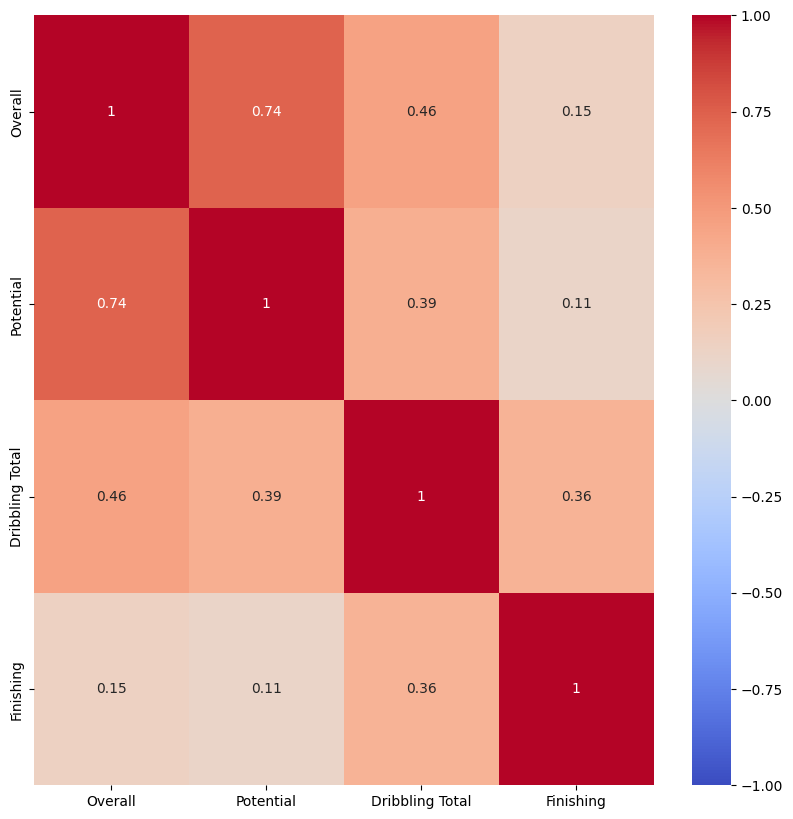

In [25]:
df_num=clean_data[["Overall" , "Potential" , "Dribbling Total" , "Finishing"]]
corr = df_num.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True, cmap='coolwarm', vmin=-1, vmax=1)

##   Visualisation :

## Box Plot :


- Shows the distribution of the Overall rating.
- The outliers are values above the upper whisker, which appears to end at around 85. Any points above 85 (e.g., in the 87.5 to 90 range) are considered outliers.
- Distribution: The box plot suggests that the distribution of overall ratings is slightly skewed to the right, as the upper whisker is longer than the lower whisker. This indicates that there are more ratings on the higher end of the scale.
- Spread: The IQR (the height of the box) gives us an idea of the spread of the middle 50% of the data. In this case, the IQR appears to be around 2.5.
- Outliers: The presence of outliers above the upper whisker suggests that there are some exceptionally high ratings compared to the majority of the data.

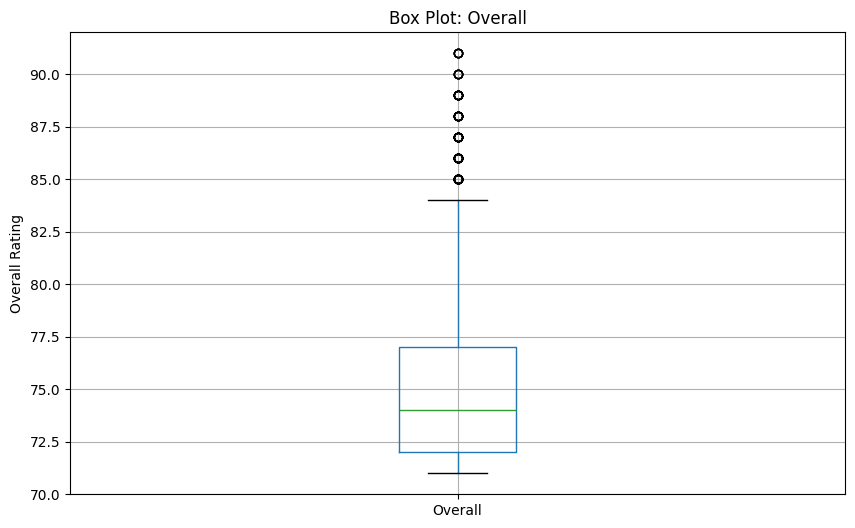

In [26]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
plt.figure(figsize=(10, 6))
df.boxplot(column=['Overall'])
plt.title('Box Plot: Overall')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

## Scatter Plot :

Displays the relationship between Overall and Potential.

- In The Scatter Plot : 
- Points: Each dot on the plot represents a data point. The horizontal position of the dot shows the value of the "Overall" variable, and the vertical position shows the value of the "Potential" variable.
1. Overall (x-axis): This axis represents the "Overall" variable, ranging from approximately 70 to 90.
2. Potential (y-axis): This axis represents the "Potential" variable, also ranging from approximately 70 to 95.

- From The Scatter Plot :
1. Positive Correlation: The general trend of the points suggests a positive correlation between "Overall" and "Potential". This means that as the "Overall" value increases, the "Potential" value also tends to increase.
2. Clustered Points: The points are clustered along a diagonal line, indicating that the relationship between the two variables is relatively strong and consistent.
3. Variation: While there is a clear positive correlation, there is also some variation in the points. This suggests that while the two variables are related, there are other factors that can influence the "Potential" value.

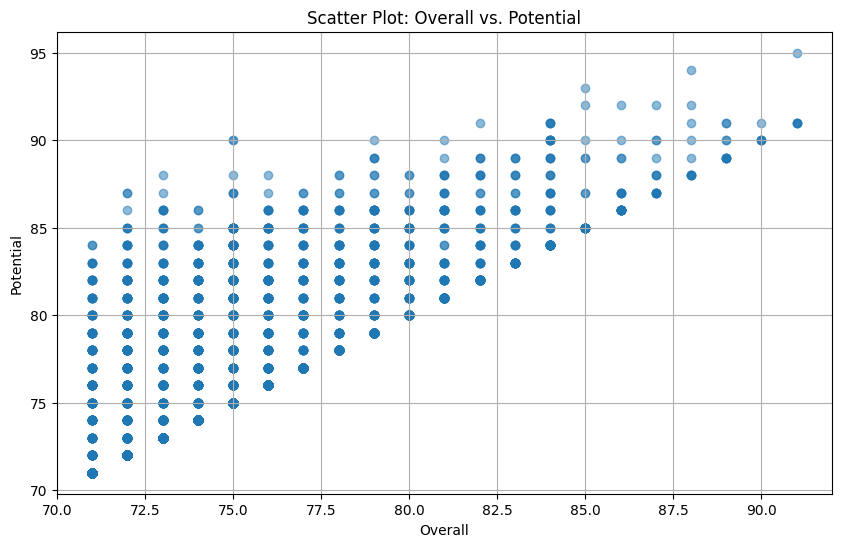

In [27]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall'], df['Potential'], alpha=0.5)
plt.title('Scatter Plot: Overall vs. Potential')
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.grid(True)
plt.show()

## Histogram :

Illustrates the distribution of Dribbling Total and Finishing.
- The x-axis is labeled "Dribbling Total," which represents the range of scores or values.
- The y-axis is labeled "Frequency," indicating how often each score range appears in the dataset.

- From The Histogram of Dribbling Total : 
1. The most frequent range is around 70-75 (the peak of the histogram).
2. Scores lower than 50 or higher than 90 are rare.


1. The x-axis is labeled "Finishing," representing the range of scores or values in the dataset.
2. The y-axis is labeled "Frequency," indicating how often each range of "Finishing" values occurs.

- From The Histogram of Finshing : 
1. The most frequent range is between 60 and 80, with a peak around 70–75.
2. The frequency decreases steadily below 50 and drops sharply beyond 80.

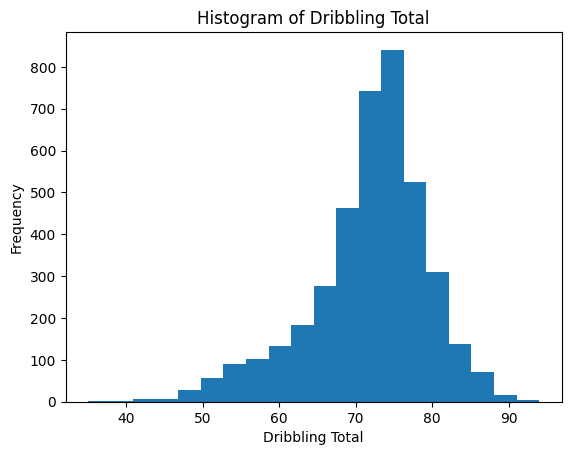

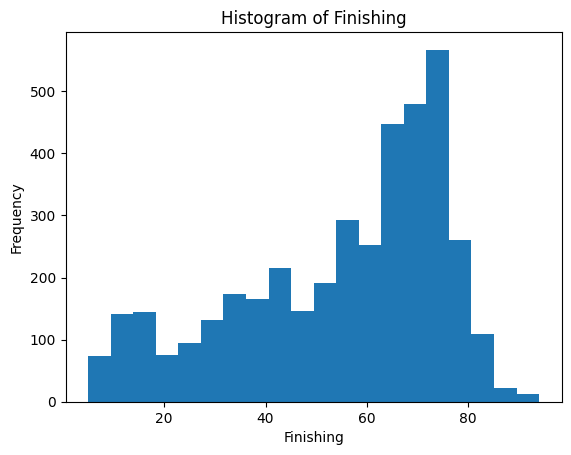

In [42]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
columns = [ 'Dribbling Total', 'Finishing']
for column in columns:
    plt.figure()
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

## Most Best 10 Players in Argentina :

The top 10 players from Argentina are identified based on their value in Euros.

- In The Histogram : 
1. The x-axis represents the player's market value in Euros (normalized or scaled values, potentially between 0 and 1).
2. The y-axis lists the names of the players.

- From The Histogram : 
1. Lautaro Martínez has the highest value among the listed players, as indicated by the longest bar.
2. Lionel Messi is the second-highest in value.
3. Other notable players include Paulo Dybala, Cristian Romero, and Rodrigo Javier De Paul, with progressively smaller bars

In [43]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
argentina_players = df[df["Nationality"] == "Argentina"]
argentina_players = argentina_players.groupby(["Full Name", "Nationality"])[["Value(in Euro)"]].max()
argentina_players = argentina_players.sort_values("Value(in Euro)", ascending=False).reset_index()
argentina_players.head(11)

,Full Name,Nationality,Value(in Euro)
0,Lautaro Martínez,Argentina,98500000
1,Paulo Dybala,Argentina,69500000
2,Lionel Messi,Argentina,54000000
3,Cristian Romero,Argentina,49500000
4,Marcos Acuña,Argentina,46500000
5,Ángel Correa,Argentina,42500000
6,Rodrigo Javier De Paul,Argentina,42000000
7,Lisandro Martínez,Argentina,35000000
8,Julián Álvarez,Argentina,32000000
9,Nicolás González,Argentina,32000000


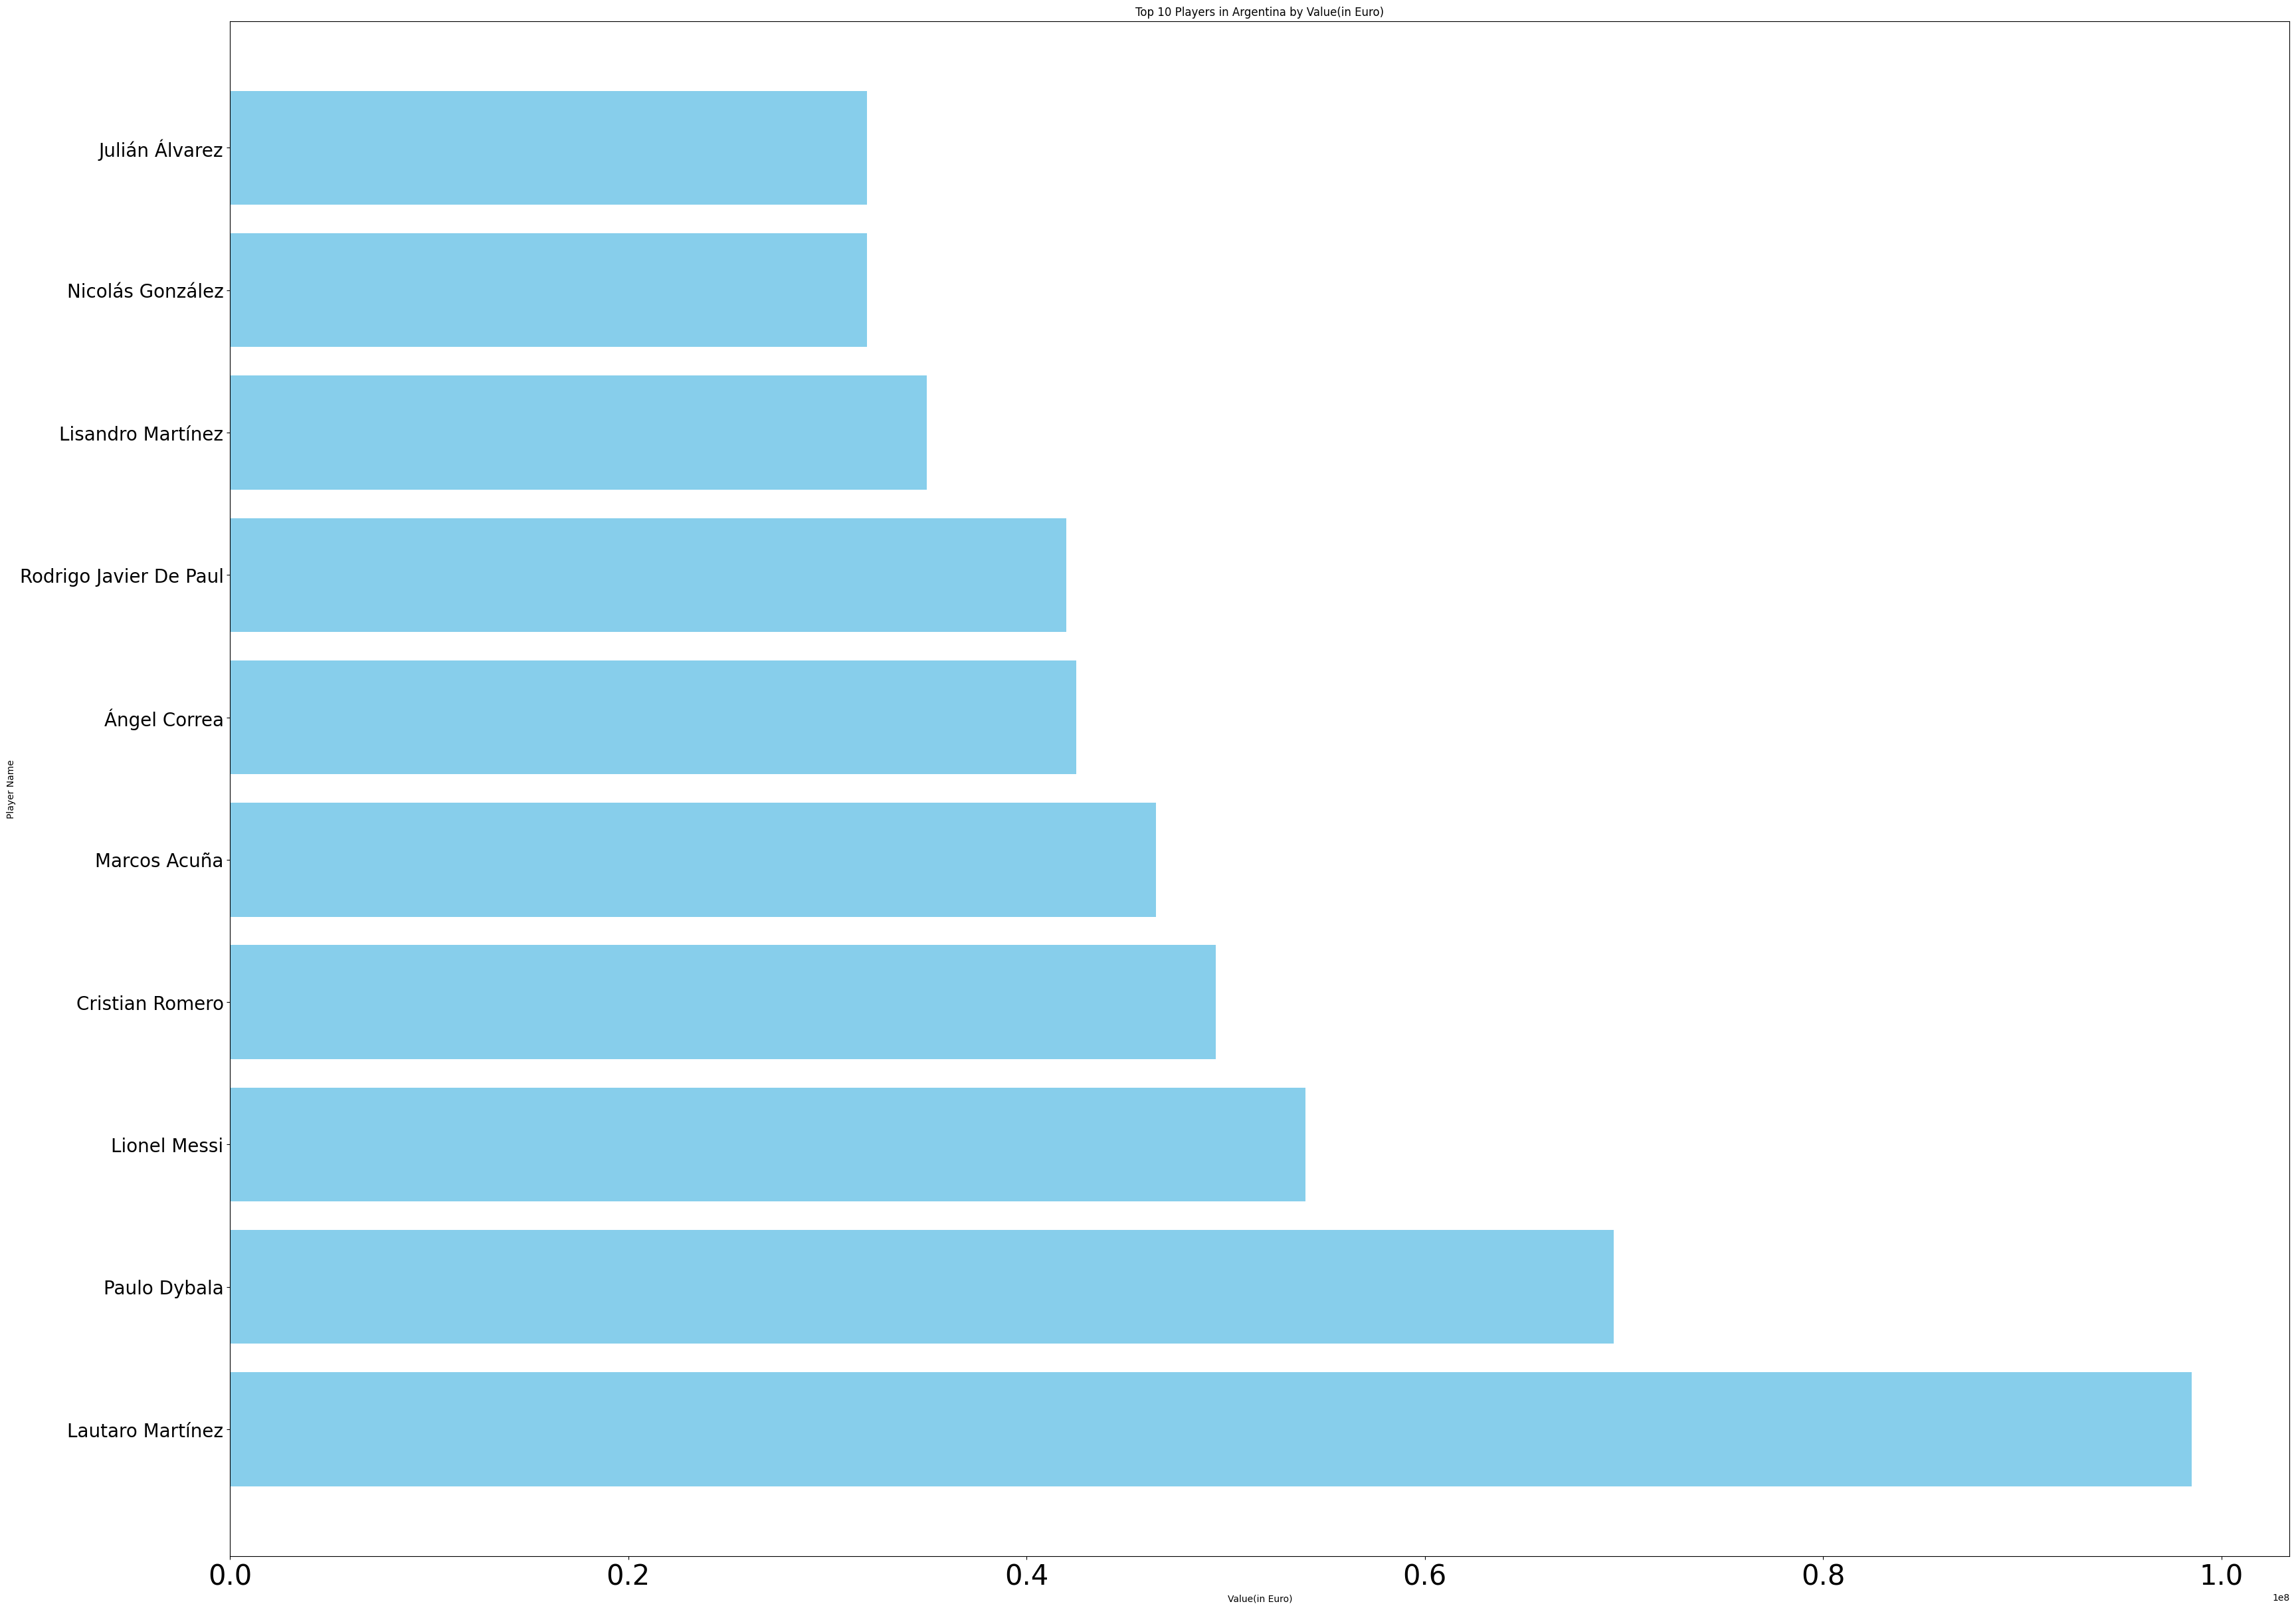

In [44]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
top_players = df[df["Nationality"] == "Argentina"].nlargest(10, "Value(in Euro)")
plt.figure(figsize=(40, 30))
plt.barh(top_players['Full Name'], top_players["Value(in Euro)"], color='skyblue')
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel("Value(in Euro)")
plt.ylabel("Player Name")
plt.title("Top 10 Players in Argentina by Value(in Euro)")
plt.show()

## Pie Chart For Most Best 10 Players In Argentina 

The players are listed clockwise from the top, with their corresponding percentage of the total rating shown in the pie slices.

- Here are the top 10 Argentine players according to the image:
1. Lionel Messi: 10.7%
2. Paulo Dybala: 10.1%
3. Lautaro Martínez: 10.1%
4. Marcos Acuña: 10.0%
5. Alejandro Gómez: 9.9%
6. Emiliano Martínez: 9.9%
7. Ángel Di María: 9.9%
8. Rodrigo Javier De Paul: 9.9%
9. Cristian Romero: 9.8%
10. Ángel Correa: 9.8%
- Messi has the highest overall rating with 10.7%, followed by Dybala and Martínez tied at 10.1%.

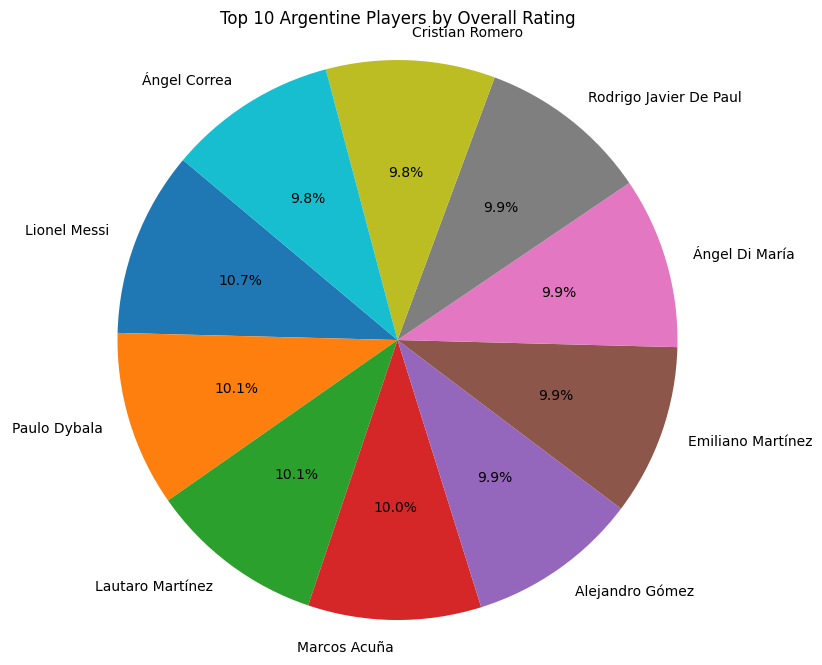

In [45]:
data = pd.read_csv("FIFA_merged.csv", encoding='latin1')
argentina_players = data[data['Nationality'] == 'Argentina']
top_10_argentina = argentina_players.nlargest(10, 'Overall')[['Full Name', 'Overall']]
plt.figure(figsize=(10, 8))
plt.pie(
    top_10_argentina['Overall'],
    labels=top_10_argentina['Full Name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title('Top 10 Argentine Players by Overall Rating')
plt.axis('equal')  
plt.show()

## Total Stats for Top Nationalities :

The total stats for players from the top 10 nationalities are calculated and visualized

- In The Histogram : 
1. X-axis (Nationality): Lists the top 10 nationalities contributing to the total stats.
Examples include Brazil, Spain, France, etc.
2. Y-axis (Total Stats): Represents the aggregated or cumulative statistic values for each nationality.

- From The Histogram : 
1. Brazil and Spain are the top contributors, with total stats exceeding 700,000.
2. France, Argentina, and England follow in descending order.
3. Belgium has the lowest contribution among the top 10, with a total stat value noticeably smaller.

In [46]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
nationality_counts = df["Nationality"].value_counts()
nationality_counts_df = nationality_counts.reset_index()
nationality_counts_df.columns = ["Nationality", "TotalStats"]
nationality_counts_df

,Nationality,TotalStats
0,Brazil,406
1,Spain,390
2,France,287
3,Argentina,265
4,England,238
...,...,...
107,Uganda,1
108,Burundi,1
109,Cyprus,1
110,Tanzania,1


C:\Users\Eng. Abdalla\AppData\Local\Temp\ipykernel_12304\775904129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Nationality', y='TotalStats', data=top_nationalities, palette=unique_colors)


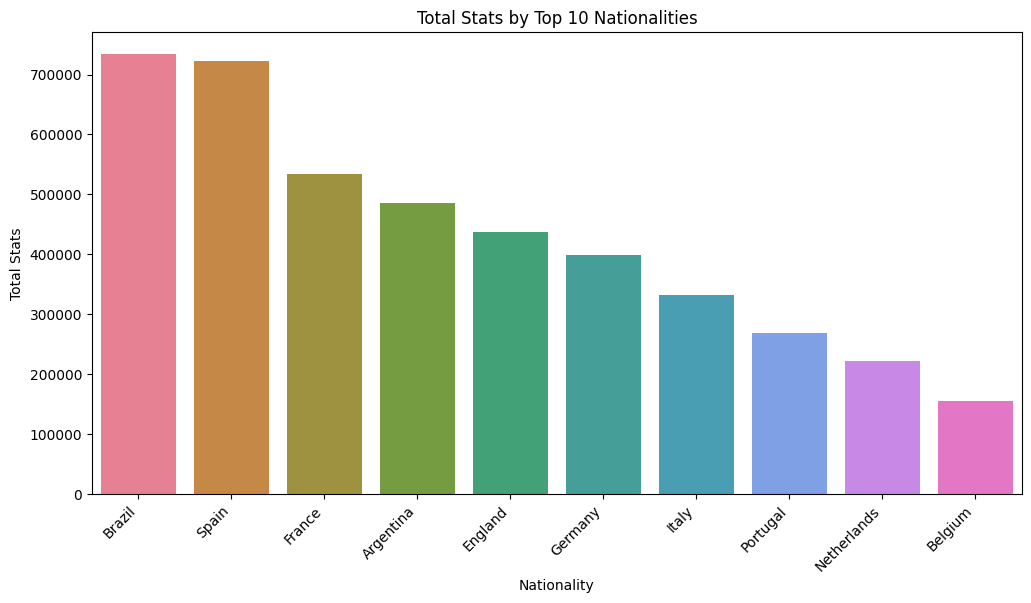

In [47]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
top_nationalities = df.groupby('Nationality')['TotalStats'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
unique_colors = sn.color_palette("husl", len(top_nationalities['Nationality'].unique()))
sn.barplot(x='Nationality', y='TotalStats', data=top_nationalities, palette=unique_colors)
plt.xlabel('Nationality')
plt.ylabel('Total Stats')
plt.title('Total Stats by Top 10 Nationalities')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Curve :

## Curve Plot of Dribbling Total For The top 10 Argentina Players :

A curve plot is created to show the Dribbling Total for the top 10 players from Argentina.

- In The Curve Plot : 
1. X-axis (Player Name):
Displays the names of the top 10 players in descending order of their dribbling scores.
Notable players include Lionel Messi, Paulo Dybala, Ángel Di María, and others.
2. Y-axis (Dribbling Total):
Represents the dribbling scores of the players. The values range from approximately 85 to 94.

- From The Curve Plot : 
1. Lionel Messi has the highest dribbling score (around 94), leading by a noticeable margin.
2. Paulo Dybala follows with a score slightly above 90.
3. The scores gradually decrease with players like Marcos Acuña, Ángel Di María, and Ángel Correa maintaining relatively similar values.
4. Franco Armani, at the bottom, has the lowest dribbling score.


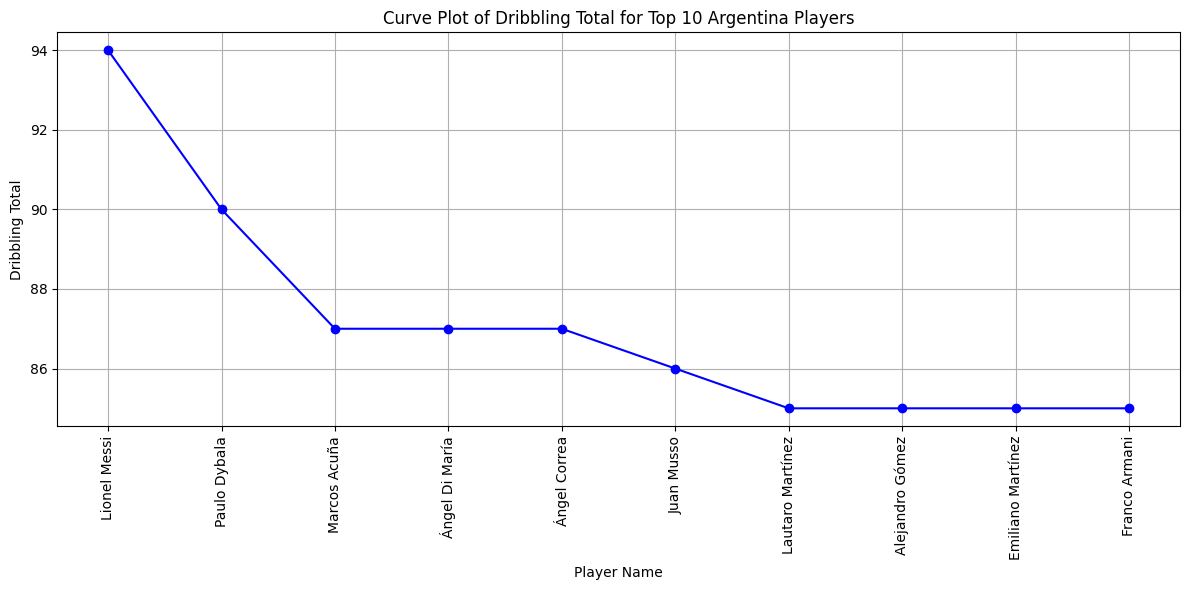

In [48]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
top_argentina_players = df[df["Nationality"] == "Argentina"].nlargest(10, "Dribbling Total")
plt.figure(figsize=(12, 6))
plt.plot(top_argentina_players['Full Name'], top_argentina_players['Dribbling Total'], marker='o', linestyle='-', color='b')
plt.xlabel('Player Name')
plt.ylabel('Dribbling Total')
plt.title('Curve Plot of Dribbling Total for Top 10 Argentina Players')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

## Feature selection, Machine Learning algorithm and Evlauation :

 perform feature selection, train a machine learning model, evaluate its performance, and visualize the results using the columns Overall, Potential, Age, TotalStats, Dribbling Total, Finishing, and Value(in Euro) :

- In The Diagram (Linear Regression) : 
1. X-axis (Predicted Values):
Represents the predicted values generated by the regression model.
2. Y-axis (Residuals):
Represents the difference between the observed (actual) values and the predicted values (Resdiual = Observed - Predicted)

- Residual Plot for Decision (Tree Regressor):
This plot is a visual representation of the residuals (errors) of a Decision Tree Regressor model. Residuals are the differences between the predicted values and the actual values of the target variable.
1. X-axis: Predicted Values by the Decision Tree model.
2. Y-axis: Residuals (Actual Value - Predicted Value).
 
- Residual Plot Analysis :
Both residual plots provide insights into the performance of the respective models.

1. Decision Tree Regressor:

The residuals are randomly scattered around the horizontal line at zero, indicating a good fit.
The model's accuracy seems consistent across different predicted values.
A few outliers might require further investigation.

2. Linear Regression:

The residuals show a clear pattern, suggesting that the model's accuracy varies based on the predicted value. This is known as heteroscedasticity.
The increasing spread of residuals indicates that a linear relationship might not be the best fit for the data.
Some outliers are present, which could affect the model's overall performance.
Overall, the decision tree regressor appears to be a better fit for the data compared to the linear regression model. The decision tree model's residuals are more randomly distributed and show less systematic patterns, suggesting that it captures the underlying relationship between the variables more effectively.

## 

Accuracy = 0.52875
R^2 =  0.7488334554491536


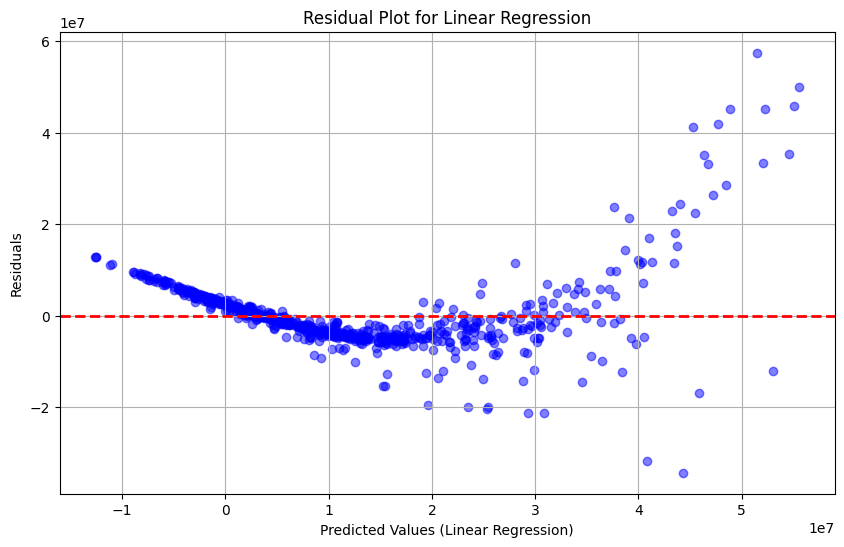

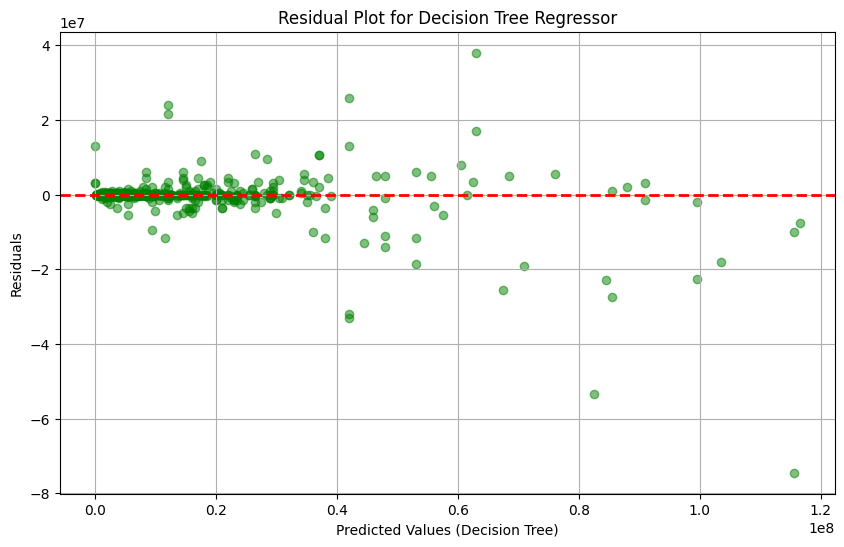

In [15]:
df = pd.read_csv("FIFA_merged.csv", encoding='latin1')
features = ['Overall', 'Potential', 'Age', 'TotalStats', 'Dribbling Total', 'Finishing']
target = 'Value(in Euro)'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.predict(X_test)
print("R^2 = " , metrics.r2_score(y_test, linear_model.predict(X_test)))
residuals_linear = y_test - linear_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(linear_model.predict(X_test), residuals_linear, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Linear Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.grid(True)
plt.show()
residuals_tree = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_tree, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Decision Tree)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regressor')
plt.grid(True)
plt.show()

## Conclusions :

The project successfully demonstrates the application of data science techniques to analyze FIFA 23 players' data. By merging datasets, performing EDA, and visualizing the data, valuable insights are gained. The machine learning model provides a reasonable prediction of player values, showcasing the potential of data-driven approaches in sports analytics.


## After EDA The FIFA 23 Dataset :

Following the Exploratory Data Analysis (EDA) of the FIFA 23 dataset, several key insights and observations were made:

- Data Structure and Summary Statistics:
The dataset contains 4000 entries with 10 columns: Full Name, Overall, Potential, Value (in Euro), Nationality, Age, TotalStats, Club Name, Dribbling Total, and Finishing.
The data types are mostly integers for numerical values and objects for categorical data like names and nationalities.

- Descriptive Statistics:
The average overall rating of players is around 75, with a potential average of approximately 77.
Player values vary significantly, with the highest value reaching up to €190.5 million.
The age of players ranges from 17 to 44 years, with an average age of about 27.5 years.

- Correlation Analysis:
A correlation matrix was created to understand the relationships between different numerical features.
Strong positive correlations were observed between Overall and Potential, indicating that players with higher current ratings also have higher potential ratings.

- Data Visualization:
- Box Plot: Showed the distribution of the Overall ratings, highlighting the spread and any outliers.
- Scatter Plot: Illustrated the relationship between Overall and Potential, showing a clear positive trend.
- Histograms: Displayed the frequency distribution of Dribbling Total and Finishing, providing insights into the common skill levels among players.

- Top Players and Nationalities:
The top 10 players from Argentina were identified based on their market value, with Lautaro Martínez leading the list.
The total stats for players from the top 10 nationalities were calculated, with Brazil having the highest total stats.

- Machine Learning Model:
- A Linear Regression model  and Tree model were trained to predict player values based on features like Overall, Potential, Age, TotalStats, Dribbling Total, and Finishing.
The models' performance metrics were:
1. Accuracy = 0.52875
2. R^2 =  0.7488334554491536
- The residuals plot showed the differences between the predicted and actual values, indicating a reasonably good fit.